In [63]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from scipy import misc
from matplotlib import pylab as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import cross_validation
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

def alexnet_pipeline(X, train_y, test_X):
    """
    The features given are after all the Convolution layers and FC NN
    layers have been trained on the images. So after that the result is
    passed through the Softmax linear classifier. This is similar to running
    multinomial logistic regression on the test data set.
    """
    logreg = LogisticRegression(C=1e3, multi_class='multinomial', solver='lbfgs')
    logfit = logreg.fit(X, train_y)
    T = logfit.predict_proba(test_X)
    predict_test = logfit.predict(test_X)
    #print cross_validation.cross_val_score(logreg, X, train_y, cv=10)
    #[ 0.9575  0.9775  0.9575  0.9775  0.975   0.955   0.97    0.98    0.965 0.94  ]
    
def sift_pipeline():
    pass

def attr_analysis():
    pass

if __name__ == '__main__':
    alexnet_train_np = np.load('CS5785-final-data//alexnet_feat_train.npy')
    alexnet_test_np = np.load('CS5785-final-data//alexnet_feat_test.npy')
    sift_train_np    = np.load('CS5785-final-data//SIFTBoW_train.npy')
    sift_test_np = np.load('CS5785-final-data//SIFTBoW_test.npy')

    image0001  = misc.imread('CS5785-final-data//images//train//0001.jpg')
    
    y_train_df = pd.read_csv('CS5785-final-data//train.txt', sep=' ', header=None)
    attr_list  = pd.read_csv('CS5785-final-data//attributes_list.txt', header=None)
    attr_train = pd.read_csv('CS5785-final-data//attributes_train.txt', delim_whitespace=True,header=None)
    attr_test = pd.read_csv('CS5785-final-data//attributes_test.txt', delim_whitespace=True, header=None)
    print attr_train.head()

    #attr_train.columns = attr_list[0]
    #attr_test.columns = attr_list[0]
    
    #alexnet_train_pd = pd.DataFrame(alexnet_train_np)
    #sift_train_pd = pd.DataFrame()
    #print y_train_df.head()
    #print len(set(y_train_df[1]))
    #plt.imshow(alexnet_train_np[0].reshape(32,32))
    #plt.show()
    
    #alexnet_pipeline(alexnet_train_np, y_train_df[1], alexnet_test_np)
    
    #tsne_model = TSNE(n_components=2, n_iter=200)
    #Y = tsne_model.fit_transform(alexnet_train_np)
    #plt.scatter(Y[:,0], Y[:,1])
    #plt.show()

          0                                                  1
0  0000.jpg  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...
1  0001.jpg  0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
2  0002.jpg  0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...
3  0003.jpg  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
4  0004.jpg  0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,...


ValueError: Length mismatch: Expected axis has 2 elements, new values have 102 elements

In [47]:
    #plt.hist(sift_train_np[7], bins=16)
    #plt.show()
    #plt.hist2d(sift_train_np[0], sift_train_np[1], bins=16)
    #plt.show()
    
    #sift_train_pca = PCA(n_components=200).fit(sift_train_np)
    #sift_test_pca = PCA(n_components=200).fit(sift_test_np)
    #sift_train_cov = sift_train_pca.get_covariance()
    #sift_test_cov = sift_test_pca.get_covariance()
    #print sift_train_pca.explained_variance_ratio_[:16]
    #print sift_test_pca.explained_variance_ratio_[:16]
    #plt.plot(sift_train_pca.explained_variance_ratio_)
    #plt.show()
    #plt.plot(sift_test_pca.explained_variance_ratio_)
    #plt.show()
    
    #print sift_train_cov.shape
    #plt.pcolor(sift_train_cov)
    #plt.colorbar()
    #plt.yticks(arange(0.5,10.5),range(0,sift_train_cov.shape[1]))
    #plt.xticks(arange(0.5,10.5),range(0,sift_train_cov.shape[0]))
    #plt.yticks()
    #plt.xticks()
    
    #plt.show()

In [48]:
    # To plot the covariance matrix
    #plt.pcolor(sift_train_cov)
    #plt.colorbar()
    #plt.show()
    
    # Clustering the SIFT data as 256 dimensional 16 vectors stacked together.
    sift_data = np.vstack(([sift_train_np[i].reshape(16,256) for i in range(sift_train_np.shape[0])]))
    print sift_data.shape
    #np.random.seed(17)
    #kmeans = KMeans(n_clusters=200)
    #kmeans = kmeans.fit(sift_data)
    #print kmeans.score

    clf = OneVsRestClassifier(SVC(probability=True))
    lclf = LinearSVC()
    #sift_test_labels = lclf.fit(sift_train_np, y_train_df[1]).predict(sift_test_np)
    #sift_test_proba = clf.fit(sift_train_np, y_train_df[1]).predict_proba(sift_test_np)
    #print sift_test_proba.shape
    #print sift_test_labels
    

    #print cross_validation.cross_val_score(clf, sift_train_np, y_train_df[1], cv=3, n_jobs=2)

    sift_hist_train = np.vstack([np.histogram(x, bins=256)[0] for x in sift_train_np])
    sift_hist_test = np.vstack([np.histogram(x, bins=256)[0] for x in sift_test_np])
    #sift_pipeline(sift_hist_train, y_train_df[1], sift_hist_test)
    sift_hist_train_ss = StandardScaler().fit_transform(sift_hist_train)
    print sift_hist_train_ss.shape
    #print sift_hist_train_ss[0]
    svm = LinearSVC(C=1e3)
    #svm = svm.fit(sift_hist_train_ss, train_y)
    #predict_test = svm.predict(test_X)
    #print cross_validation.cross_val_score(svm, sift_hist_train_ss, y_train_df[1], cv=3)
    #print predict_test[:10]

    np.random.seed(17)
    kmeans = KMeans(n_clusters=200)
    kmeans = kmeans.fit(sift_hist_train)
    kmeans_cc = kmeans.cluster_centers_
    print kmeans_cc.shape
    print kmeans.labels_

(48000, 256)
(3000, 256)
(200, 256)
[145 160 177 ...,  69   4  40]


/home/kulinseth/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


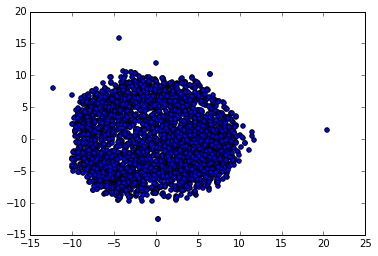

In [51]:
    #print (kmeans.labels_[:50])
    #print (y_train_df[1][:50])
    tsne_model = TSNE(n_components=2, n_iter=200)
    Y = tsne_model.fit_transform(sift_train_np)
    plt.scatter(Y[:,0], Y[:,1])
    plt.show()    